# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. 

Задачи:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые группы клиентов;
        2) предложить меры по снижению оттока;
        3) определить другие особенности взаимодействия с клиентами.

<a id=plan></a>
## План работ

[Шаг 1. Подготовить и изучить общую информацию о данных](#step1)

- [x] Загрузить данные
- [x] Проверить пропуски и типы данных

[Шаг 2. Провести EDA](#step2)
- [x] Изучить средние значения и стандартные отклонения (метод describe())
- [x] Изучить средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (использовать метод groupby())
- [x] Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
- [x] Построить матрицу корреляций и отобразите её

[Шаг 3. Построить модель прогнозирования оттока пользователей](#step3)

Построить модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:

- [x] Разбить данные на обучающую и валидационную выборку функцией train_test_split() (!!!random_state!!!).
- [x] Обучить модель на train-выборке двумя способами:
    - [x] логистической регрессией
    - [x] случайным лесом
- [x] Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Какая модель показала себя лучше на основании метрик?

[Шаг 4. Сделать кластеризацию пользователей](#step4)
Отложить в сторону столбец с оттоком и провести кластеризацию объектов (пользователей):

- [x] Стандартизировать данные
- [x] Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму. Внимание: отрисовка дендрограммы может занять время! 
- [x] На основании полученного графика предположить, какое количество кластеров можно выделить
- [x] Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов (за число кластеров принять n=5)
- [x] Изучить средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- [x] Построить распределения признаков для кластеров. Можно ли что-то заметить по ним?
- [x] Для каждого полученного кластера посчитать долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

[Шаг 5. Сформулировать выводы и сделайте базовые рекомендации по работе с клиентами](#step5)

- [x] Сформулировать основные выводы и предложите рекомендации для стратегии взаимодействия с пользователями и их удержания.(достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.)

# Анализ

<a id=step1></a>
## Шаг 1. Подготовить и изучить общую информацию о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

# для отображения в jupiter всех колонок и столбцов df + сокращу количество цифр после запятой
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision',2)

In [2]:
# загрузим данные и проведем первичный осмотр
gym = pd.read_csv(r'data/gym_churn.csv')
# gym = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
display(gym.head())
display(gym.info())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.0,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.0,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.0,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.0,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.0,3,1.11,1.12,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

Пропусков нет и типы данных впорядке. Разве что вназвании столбцов есть верхний регистр, избавимся от него.

In [4]:
gym.columns = gym.columns.str.lower()

In [5]:
gym.sample()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
1356,1,1,0,0,1,1,1,33,93.19,1.0,3,1.19,1.21,0


[План работ](#plan)

<a id=step2></a> 
## Шаг 2. Провести EDA

In [6]:
# изучим средние значения и стандартные отклонения 
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.00,4000.00,4000.00,4000.00,4000.0,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.9,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.3,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.0,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.0,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.0,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.0,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.0,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Какие выводи можно сделать из средних значений:

- У нас почти поровну мужчин и женщин, с небольшим преимуществом пола под цифрой 1 (примечательно что мы не знаем что значит 0, что единица)
- Большинство клиентов находятся рядом с фитнес-центром
- Почти половина клиентов - сотрдуники компаний партнеров
- 31% клиентов были приведены по акции "Приведи друга"
- Телефон указан почти у всех клиентов (90%)
- Средняя длительность абонемента 4,68 месяцев. Медианное значение - 1 месяц. То есть больше тех, у кого абонимент на 1 месяц. 
- 41% клиентов посещал групповые занятия
- Средний возраст - 29 лет
- В среднем фитнес-центр зарабатывает 146.94 уе с клиента по мимо стоимости абонемента
- Среднее время до конца абонемента 4,32 месяца. Однако мы знаем и видим, что у большенства эта цифра 1. 
- В среднем наши клиенты с нами около 4 месяцев, медианное значение - 3 месяца. 
- Средняя частота посещений в неделю за прошлый месяц составляет 1.88
- Средняя частота посещений в неделю за все время почти такая же как и за прошлый месяц, 1.77. Видимо эти два параметра будут сильно коррелировать.
- Наконе факт оттока, средняя настораживает - 27%. То есть в прошлом месяце потеряли чуть больше четверти клиентов. 

Касательно стандартного отклонения, в наблюдениях где медианное значение сильно отличалось от среднего (срок абонемента и т.п.) так же отмечается большой разброс. 

Далее изучим средние значения в разрезе ушел/не ушел

In [7]:
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.9,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.9,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


В глаза бросается достаточно очевидная вещь, чем больше клиента связывает с фитнес-центром, тем больше шансов, что он не уйдет. 
Среди оставшихся средние значения по всем параметрам (кроме пола) выше чем у тех, кто ушел. Например, это клиенты которых связывают партнерские отношения, у которых длительные абонементы, посещающие группые занятия и которые в принципе уже не первый месяц посещают фитнес. 

Можно отметить, что пол и наличие телефона, по всей видимости, практически не влияют на отток. 

Проясняется задача, фитнес-центру нужно удержать клиента в течение первого месяца. Судя по всему, этот месяц критичен. 

Подробнее изучим признаки, построив ряд графиков. Разобьем посетителей на две таблицы, которые ушли и не ушли. И выделим бинарные и количественные признаки в списки. 

In [8]:
gym_churn = gym.loc[gym['churn'] == 1]
gym_no_churn = gym.loc[gym['churn'] == 0]

In [9]:
binary_features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
quantitive_features = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

Пострим гистограммы для каждого из бинарных признаков, сравним ушедших и оставшихся

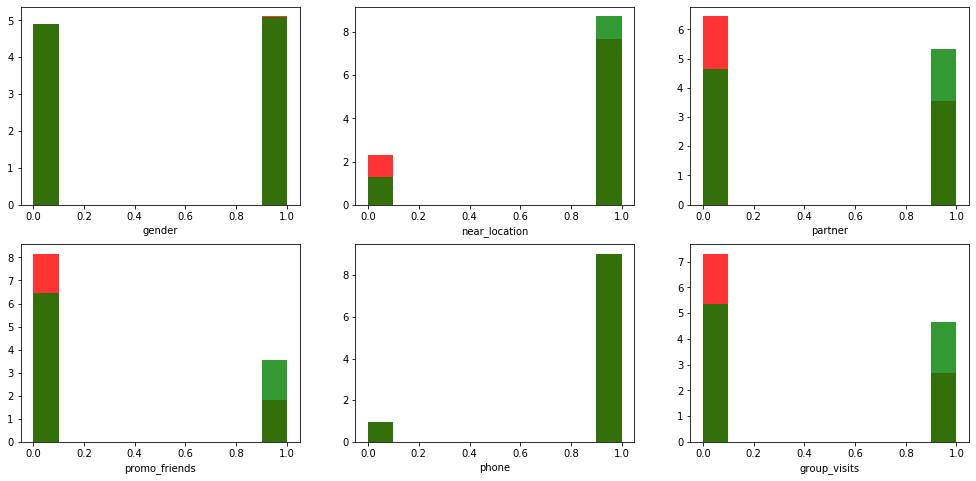

In [10]:
a = .8 # переменная для alpha
fig, axes = plt.subplots(2,3, figsize=(17, 8))
axes[0,0].hist(gym_churn[binary_features[0]], density=True, color='red', alpha=a)
axes[0,0].hist(gym_no_churn[binary_features[0]], density=True, color='green', alpha=a)
axes[0,0].set_xlabel(binary_features[0])

axes[0,1].hist(gym_churn[binary_features[1]], density=True,color='red', alpha=a)
axes[0,1].hist(gym_no_churn[binary_features[1]], density=True, color='green', alpha=a)
axes[0,1].set_xlabel(binary_features[1])

axes[0,2].hist(gym_churn[binary_features[2]], density=True,color='red', alpha=a)
axes[0,2].hist(gym_no_churn[binary_features[2]], density=True, color='green', alpha=a)
axes[0,2].set_xlabel(binary_features[2])

axes[1,0].hist(gym_churn[binary_features[3]], density=True,color='red', alpha=a)
axes[1,0].hist(gym_no_churn[binary_features[3]], density=True, color='green', alpha=a)
axes[1,0].set_xlabel(binary_features[3])

axes[1,1].hist(gym_churn[binary_features[4]], density=True,color='red', alpha=a)
axes[1,1].hist(gym_no_churn[binary_features[4]], density=True, color='green', alpha=a)
axes[1,1].set_xlabel(binary_features[4])

axes[1,2].hist(gym_churn[binary_features[5]], density=True,color='red', alpha=a)
axes[1,2].hist(gym_no_churn[binary_features[5]], density=True, color='green', alpha=a)
axes[1,2].set_xlabel(binary_features[5])
plt.show();



Как и было отмечено ранее, пол не особо влияет на отток, одинаково уходят как мужчини так и женщины
Покидает фитнес-центр чут больше тех, кто проживает не рядом и у кого нет партнерских отношений с центром. Кроме того клиенты без дурзей и реже посещающие групповые занятие так же больше подвержены оттоку. 

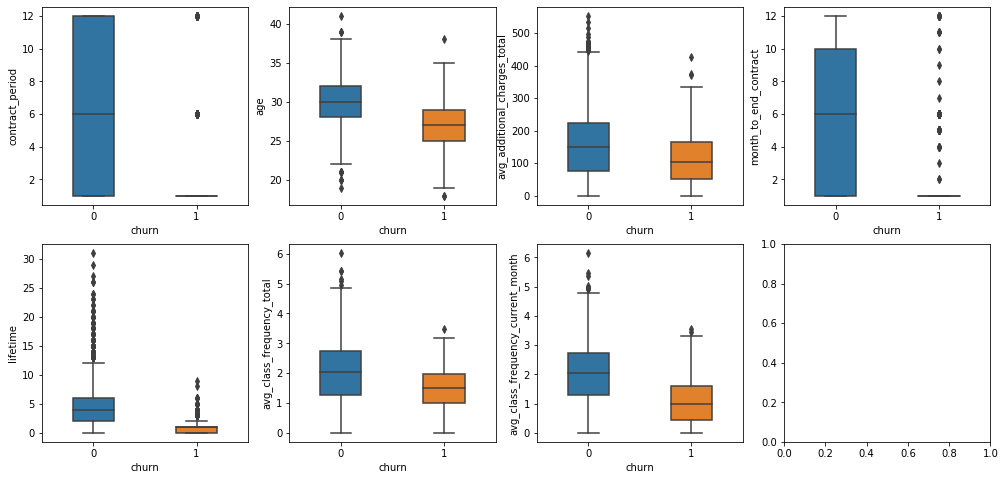

In [11]:
fig, axes = plt.subplots(2,4, figsize=(17, 8))
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[0], width=0.4, ax=axes[0,0])
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[1], width=0.4, ax=axes[0,1])
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[2], width=0.4, ax=axes[0,2])
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[3], width=0.4, ax=axes[0,3])
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[4], width=0.4, ax=axes[1,0])
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[5], width=0.4, ax=axes[1,1])
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[6], width=0.4, ax=axes[1,2])

По всем количественным признакам клиенты, которые остались имеют преимущество.
Особенно выделается такой признак как длительность абонемента, с "длинными" абонементами уходят в отток меньше клиентов, кроме того чем дольшедо конца абонемента, тем меньше вероятность что клиент уйдет. Так же, выделяется срок жизни клиента, чем дольше клиент с нами, тем он лояльнее. Не замечено ни одного клиента, который покинул бы нас после 10 месяцев посещений.

Далее построим матрицу корреляц, изучим взаимосвязи разных признаков.

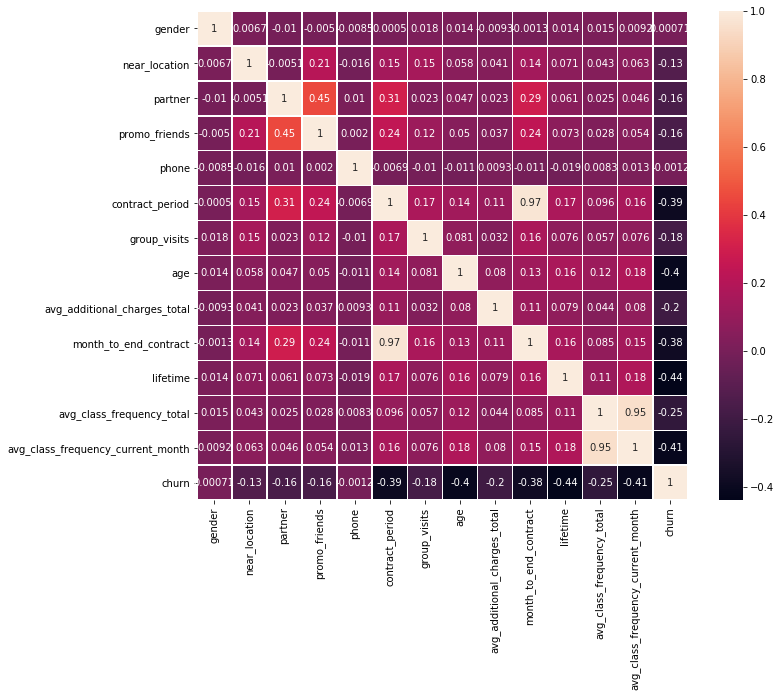

In [12]:
plt.subplots(figsize=(11, 9))
sns.heatmap(gym.corr(), annot=True, linewidths=.5);

Как и было отмечено ранее, сильная корреляция наблюдается между посещяемостью фитнес-центра в текущем месяце и за все время. Кроме того, чрезвычайно сильная корреляция между сроком абонемента и количеством месяцев до его окончания. Что так же не удивительно.
Так же, средняя зависимость просматривается между признаком партнер и программой приведи друга. Вероятно клиенты по партнерской программе чащу зовут друзей/коллег в фитнес-центр. 

Удали два признака с коллеряций близкой к 1.

In [13]:
gym = gym.drop(['avg_class_frequency_current_month', 'month_to_end_contract'], axis=1)

### Вывод

Исходя из проделанного предварительного анализа признаков, можно сделать следующие выводы/предположения.

Были выявлены предположительно самые мощные признаки влияющие на отток, такие как срок абонемента, время с момента первого обращения 
Отмечено, что в таблице присутствуют четыре сильно коррелирующих между собой признака, соответственно два можно и нужно будет не учитывать при будущем построении модели. 

[План работ](#plan)

<a id=step3></a> 
## Шаг 3. Построить модель прогнозирования оттока пользователей

Приступи к построению модели бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце.

Первым делом подготовим две переменные: с признаками и целевой переменной.

In [14]:
X = gym.drop('churn', axis=1)
y = gym['churn']

In [16]:
# теперь поделим выборку на обучающую и валидационную
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,  stratify = y )

In [16]:
# # проведем стандартизацию
# scaler = StandardScaler()
# scaler.fit(x_train)

# # Преобразуйте обучающий и валидационные наборы данных
# x_train_st = scaler.transform(x_train)
# x_test_st = scaler.transform(x_test)

In [17]:
# обучим две модели алгоритмами логистической регрессией и случайным лесом
log_reg_model = LogisticRegression(random_state=0, max_iter=5000, solver='lbfgs')
log_reg_model.fit(x_train,y_train)
log_reg_predictions = log_reg_model.predict(x_test)

dec_tree_model = DecisionTreeClassifier(random_state=0)
dec_tree_model.fit(x_train,y_train)
dec_tree_predictions = dec_tree_model.predict(x_test)

In [18]:
# изучим основные метрики
print('Метрики LogisticRegression:')
print('Accuracy - {:.2f}'.format(accuracy_score(y_test, log_reg_predictions)))
print('Precision - {:.2f}'.format(precision_score(y_test, log_reg_predictions)))
print('Recall - {:.2f}'.format(recall_score(y_test, log_reg_predictions)))
print('-------------------------------')
print('Метрики DecisionTreeClassifier:')
print('Accuracy - {:.2f}'.format(accuracy_score(y_test, dec_tree_predictions)))
print('Precision - {:.2f}'.format(precision_score(y_test, dec_tree_predictions)))
print('Recall - {:.2f}'.format(recall_score(y_test, dec_tree_predictions)))

Метрики LogisticRegression:
Accuracy - 0.88
Precision - 0.76
Recall - 0.77
-------------------------------
Метрики DecisionTreeClassifier:
Accuracy - 0.83
Precision - 0.64
Recall - 0.71


### Вывод
Алгоритм логистической регрессии обощел по каждой из метрик случайный лес. 
Доля правильных ответов равна 90%, точность прогноза 78%, а полнота 81%. 

[План работ](#plan)

<a id=step4></a> 
## Шаг 4. Сделать кластеризацию пользователей

После бинарной классификации перейдем к кластеризации. Прежде всего проведем стандартизацию.

In [19]:
# проведем стандартизацию всех параметров
scaler = StandardScaler()
scaler.fit(X)

# Преобразуем набор данных
X_st = scaler.transform(X)
# x_test_st = scaler.transform(x_test)

In [20]:
# формируем таблицу связок
linked = linkage(X_st, method = 'ward') 

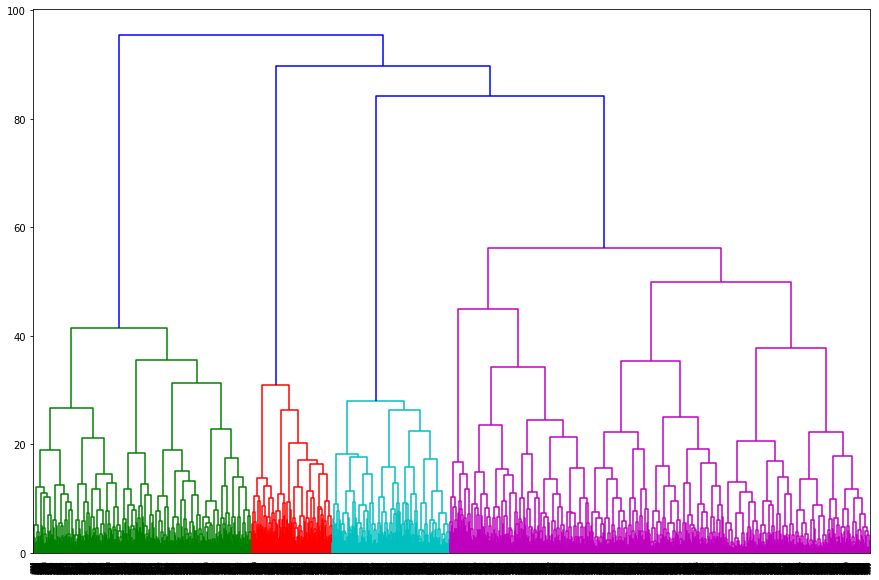

In [21]:
# рисуем дендограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Можно был бы провести воображаемую линию чуть ниже 40 и получить 9 кластеров!
Однако длянаших целей выберем число меньше, проведем линию чуть между 40 и 60 по вертикали и выделим 5 кластеров, так как линия пересечет вертикальные линии 5-и групп.

Далее обучим модель на основании алгоритма K-Means



In [22]:
km = KMeans(n_clusters = 5, random_state=0)
k_means_clusters = km.fit_predict(X_st)
# преоразуем в Series, чтобы затем объединить с основной таблицей
k_means_clusters = pd.Series(k_means_clusters, name='cluster')

In [23]:
gym_with_clusters = pd.concat([gym, k_means_clusters],axis=1)

In [24]:
# проверка
gym_with_clusters.sample(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster
3784,1,1,0,1,1,6,1,32,169.99,1,3.50,0,3
1317,0,1,1,0,1,6,0,34,282.71,6,2.04,0,2


Теперь можно изучить средние значения признаков для каждого из кластеров и построить графики распределения для признаков.

In [25]:
gym_with_clusters.groupby('cluster').mean().sort_values(by='churn')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster,,,,,,,,,,,,
1,0.49,1.00,0.96,0.89,1.0,7.66,0.46,29.54,155.86,4.38,1.98,0.12
3,0.54,1.00,0.25,0.08,1.0,4.53,1.00,29.54,148.09,3.76,1.94,0.20
4,0.52,0.86,0.47,0.31,0.0,4.78,0.43,29.30,144.21,3.94,1.85,0.27
2,0.51,1.00,0.24,0.06,1.0,2.82,0.00,28.77,143.38,3.34,1.80,0.38
0,0.50,0.00,0.49,0.08,1.0,3.03,0.24,28.72,137.54,3.06,1.77,0.40


In [26]:
binary_features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits','churn']
quantitive_features = ['contract_period', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total']

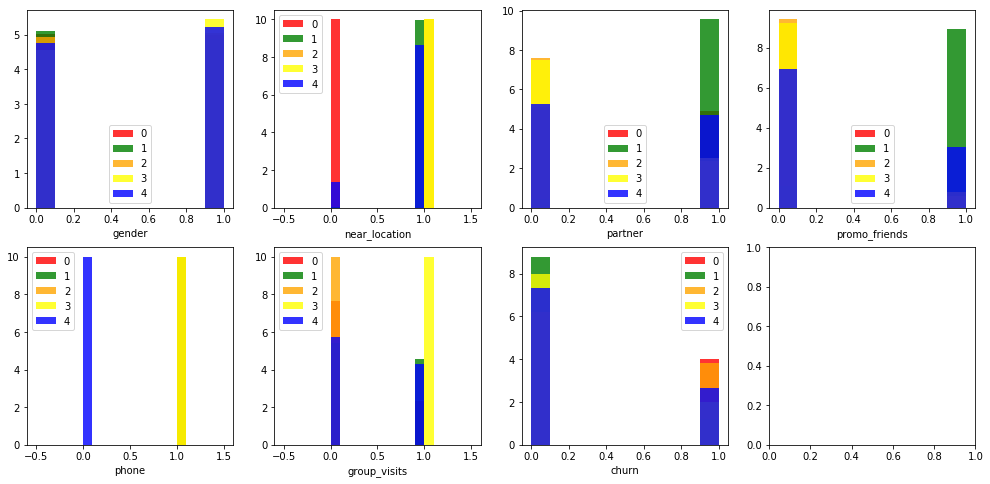

In [27]:
# строим сабплоты/ячейки для будущих графиков и задаем переменные: счетчик и координаты сабплота
fig, axes = plt.subplots(2,4, figsize=(17, 8))
counter = 0
ax_x = 0
ax_y = 0
a = .8

for feature in binary_features:
    # заполняем первый ряд сабплота, если counter = 4, значит первый ряд заполнен и пора переходить ко второму
    if counter < 4:
        axes[ax_y,ax_x].hist(gym_with_clusters.query('cluster == 0 ')[feature], density=True,color='red', alpha=a)
        axes[ax_y,ax_x].hist(gym_with_clusters.query('cluster == 1 ')[feature], density=True,color='green', alpha=a)
        axes[ax_y,ax_x].hist(gym_with_clusters.query('cluster == 2 ')[feature], density=True,color='orange', alpha=a)
        axes[ax_y,ax_x].hist(gym_with_clusters.query('cluster == 3 ')[feature], density=True, color='yellow', alpha=a)
        axes[ax_y,ax_x].hist(gym_with_clusters.query('cluster == 4 ')[feature], density=True,color='blue', alpha=a)
        axes[ax_y,ax_x].set_xlabel(feature)
        axes[ax_y,ax_x].legend(['0', '1', '2', '3', '4'])
        ax_x += 1
        counter += 1

    else:
        ax_y = 1 # теперь строим все графики на втором ряду
        if ax_x == 4 and counter == 4: #обнуляем координаты по оси Х для первого графика на втором ряду
            ax_x = 0
        else:
            ax_x += 1 #во всех остальных случаях у нас будет +1 к кординатам по оси x
        axes[ax_y,ax_x].hist(gym_with_clusters.query('cluster == 0 ')[feature], density=True,color='red', alpha=a)
        axes[ax_y,ax_x].hist(gym_with_clusters.query('cluster == 1 ')[feature], density=True,color='green', alpha=a)
        axes[ax_y,ax_x].hist(gym_with_clusters.query('cluster == 2 ')[feature], density=True,color='orange', alpha=a)
        axes[ax_y,ax_x].hist(gym_with_clusters.query('cluster == 3 ')[feature], density=True, color='yellow', alpha=a)
        axes[ax_y,ax_x].hist(gym_with_clusters.query('cluster == 4 ')[feature], density=True,color='blue', alpha=a)
        axes[ax_y,ax_x].set_xlabel(feature)
        axes[ax_y,ax_x].legend(['0', '1', '2', '3', '4'])
        counter += 1



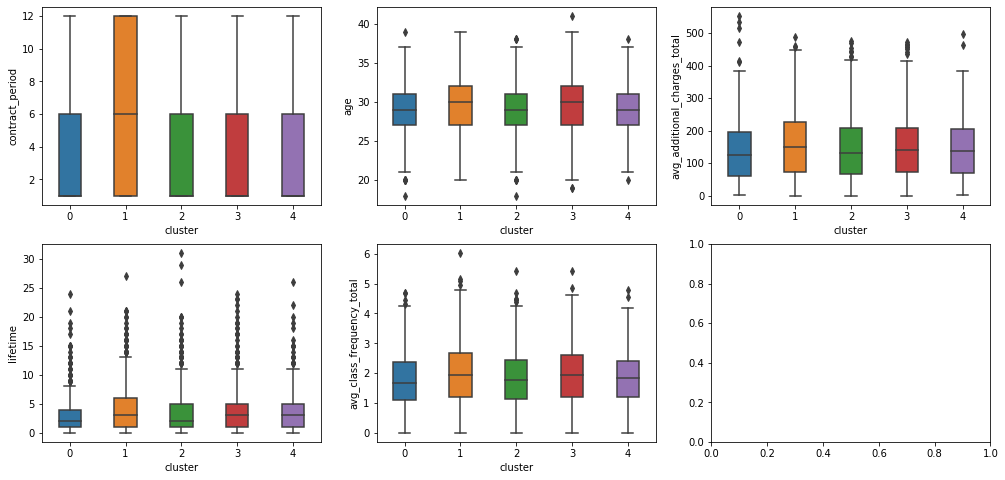

In [28]:
# строим сабплоты/ячейки для будущих графиков и задаем переменные: счетчик и координаты сабплота
fig, axes = plt.subplots(2,3, figsize=(17, 8))
counter = 0
ax_x = 0
ax_y = 0

for feature in quantitive_features:
    # заполняем первый ряд сабплота, если counter = 4, значит первый ряд заполнен и пора переходить ко второму
    if counter < 3:
        ax = sns.boxplot(data = gym_with_clusters, x = 'cluster', y = feature, width=0.4, ax=axes[ax_y, ax_x])
        ax_x += 1
        counter += 1

    else:
        ax_y = 1 # теперь строим все графики на втором ряду
        if ax_x == 3 and counter == 3: #обнуляем координаты по оси Х для первого графика на втором ряду
            ax_x = 0
        else:
            ax_x += 1 #во всех остальных случаях у нас будет +1 к кординатам по оси x
        ax = sns.boxplot(data = gym_with_clusters, x = 'cluster', y = feature, width=0.4, ax=axes[ax_y, ax_x])    
        counter += 1



**Кластер c минимальным оттоком (2%)**
- Все клиенты так или иначе находятся рядом с фитнес-центром, около трети имеют партнерские отношения с центром, почти все пришли без друзей. Длительность абонемента у этих клиентов около 6 месяцев как и  "срок жизни".
- Эти клиенты чаще других посещают групповые занятия и в среднем тренеруются почти три раза в неделю.  Кроме, с этих клиентов центр имеет большее всего дополнительных доходов.

**Кластер с оттоком чуть выше минимального (12%)**
- Так же много клиентов находятся рядом с центром, и у многих имеются партнерские отношения с фитнесом, доля пришедших с друзьями - велика. Средняя длительно контракта снижается. 
- Около половины посещало групповые занятия. Доп заработок фитнес центра, как и от первого класстера, значительный, по сравнению с прочими. 

Можно предположить, что в этой группе находятся клиенты, которые действительно заинтересованы в спорте. 

**Кластер с оттоком около четверти от количества клиентов в группе (27%)**
- Находятся рядом с центром, чуть меньше половины имеют партнерские отношения и около трети пришли от друзей. Длительность абонемента, срок до конца  и "срок жизни" промерно одинаковые, около 4,5. 
- По остальным параметрам клиенты из группы особо не выделяются, можно сказать что в общем, они посещают фитнес реже чем клиенты из предыдущих групп. 
- Примечательно, почти никто не оставил телефон.
Можно предположить, что это несамые спортивные клиенты, которые только начинают заниматься. 

**Кластер с оттоком чуть меньше половины (40%)** 
- почти никого нет рядом с фитнесом, контракт в среднем 3 месяца, и слабая посещаемость групповых заняти. 

**Лидер по оттоку - больше половины (55%)**
- Доля живущ НЕ рядом с фиитнес-центром, больше чем в остальных группах. Приходят без друзей и имеют самые короткие абонементы и срок жизни.
- Особенно четко выделяются на фоне прочих тем, что редко посещают центр. 

[План работ](#plan)

<a id=step5></a>
## Шаг 5. Сформулировать выводы и сделайте базовые рекомендации по работе с клиентами


Особенно пристальное внимание нужно уделять продолжительности абонемента. Чем меньше продолжительность абонемента, тем больше вероятность, что это последний месяц когда клиент нас посещает. Наиболее безопасная длительность - 6 месяцев. Необходимо стимулировать клиентов, предлагать бонусы, скидки и т.п., чтобы они оформляли абонемент на 6 месяцев. 

Отдельно следует обращать внимание на помещаемость, как в целом, так и на посещение групповых занятий. Чем реже клиент посещает фитнес-центр, тем более вероятно что он уйдет.  
Не все ходят на групповые занятия, но в кластерах где эта доля особенно низка, наблюдается больший процент отткой. Таким образом, для удержания клиентов можно рекомендовать "заманивать" клиентов на тренировки и групповые занятия, предлагаю бесплатные пробные, устраивая мастер-классы и т.п.

[План работ](#plan)